In [42]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# Dataset
mnist = keras.datasets.fashion_mnist
class_name = ['T-shart/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [38]:
# 데이터 전처리
# image를 0~1 사이 값으로 만들기 위해 255로 나눔
train_image = train_images.astype(np.float32) /255.0
train_image = test_images.astype(np.float32) /255.0

# one-hot Encoding
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

In [39]:
# Dataset 만들기
# shuffle : 셔플을 하지 않으면 다음에 들어갈 데이터가 중복되어 들어갈 수 있음, epochs 할 때 shuffle을 사용
# batch : 한번에 여러개 이미지를 넣어주는데 몇개씩 넣을 것인지 설정
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(buffer_size=100000).batch(64)
test_dataset=tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(64)

In [12]:
# 텐서플로우에서는 3가지 모델 작성방법을 제공
# 가장 간단하고 쉽게 만들 수 있는 방법 -> Keras Sequential API를 사용

def create_seq_model() :
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [13]:
seq_model = create_seq_model()

In [14]:
seq_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Keras Functional API 사용
# Sequential은 쌓이는 구조만 모델을 생성할 수 있기 때문에 다양한 가지치기와 같은 모델 레이어를 생성하려면
# create_func_model과 같은 형태로 생성하여 사용

def create_func_model() :
    inputs = keras.Input(shape=(28, 28))
    flatten = keras.layers.Flatten()(inputs)
    dense = keras.layers.Dense(128, activation='relu')(flatten)
    drop = keras.layers.Dropout(0.2)(dense)
    outputs = keras.layers.Dense(10, activation='softmax')(drop)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

In [19]:
func_model = create_func_model()

In [20]:
func_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [29]:
# keras.Model을 상속받아 사용
# 파이토치가 주로 사용하는 방법

class SubClassModel(keras.Model) :
    def __init__(self) :
        super(SubClassModel, self).__init__()
        self.flatten = keras.layers.Flatten(input_shape=(28, 28))
        self.dense1 = keras.layers.Dense(128, activation='relu')
        self.drop = keras.layers.Dropout(0.2)
        self.dense2 = keras.layers.Dense(10, activation='softmax')
        
    def call(self, x, training=False) : # 자동으로 호출되는 함수 - override
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.drop(x)
        return self.dense2(x)

In [30]:
subclass_model = SubClassModel()

In [31]:
inputs = tf.zeros((1, 28, 28))
subclass_model(inputs)
subclass_model.summary()

Model: "sub_class_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         multiple                  0         
                                                                 
 dense_6 (Dense)             multiple                  100480    
                                                                 
 dropout_3 (Dropout)         multiple                  0         
                                                                 
 dense_7 (Dense)             multiple                  1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Keras API 사용하여 학습
learning_rate = 0.001
seq_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy']) # 결과가 숫자로 나올경우

In [41]:
hist = seq_model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
938/938 [==============================] - 9s 8ms/step - loss: 3.1150 - accuracy: 0.6017 - val_loss: 0.8761 - val_accuracy: 0.6825
Epoch 2/10
938/938 [==============================] - 7s 8ms/step - loss: 0.8798 - accuracy: 0.6711 - val_loss: 0.6551 - val_accuracy: 0.7824
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.7743 - accuracy: 0.7089 - val_loss: 0.6275 - val_accuracy: 0.7812
Epoch 4/10
938/938 [==============================] - 7s 7ms/step - loss: 0.7261 - accuracy: 0.7325 - val_loss: 0.6136 - val_accuracy: 0.7900
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.6930 - accuracy: 0.7475 - val_loss: 0.5747 - val_accuracy: 0.8001
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.6803 - accuracy: 0.7546 - val_loss: 0.5703 - val_accuracy: 0.8142
Epoch 7/10
938/938 [==============================] - 7s 7ms/step - loss: 0.6608 - accuracy: 0.7622 - val_loss: 0.5663 - val_accuracy: 0.7507
Epoch 

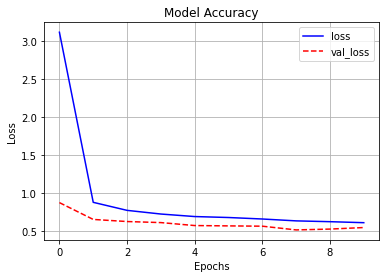

In [50]:
plt.plot(hist.history['loss'], 'b-', label='loss')
plt.plot(hist.history['val_loss'], 'r--', label='val_loss')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

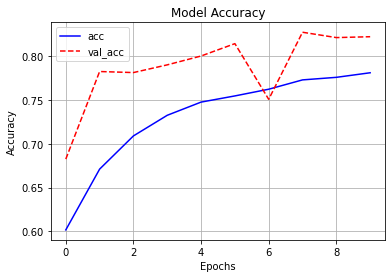

In [51]:
plt.plot(hist.history['accuracy'], 'b-', label='acc')
plt.plot(hist.history['val_accuracy'], 'r--', label='val_acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Model 저장하고 불러오기
- ## 학습된 결과를 저장해놓고 사용, 또는 이어서 학습하기 위해 모델을 저장하고 불러오는 방법

In [52]:
seq_model.save_weights('seq_model.ckpt')

In [56]:
# 새로운 모델 생성
seq_model_2 = create_seq_model()
seq_model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
seq_model_2.evaluate(test_dataset)

157/157 [==============================] - 1s 6ms/step - loss: 198.0069 - accuracy: 0.1099


[198.00689697265625, 0.10990000516176224]

In [58]:
seq_model_2.load_weights('seq_model.ckpt')

In [59]:
seq_model_2.evaluate(test_dataset)

157/157 [==============================] - 1s 6ms/step - loss: 0.5486 - accuracy: 0.8221


[0.5486211776733398, 0.822100043296814]

- ## Model 전체를 저장하고 불러오기

In [60]:
seq_model.save('seq_model')

INFO:tensorflow:Assets written to: seq_model/assets


In [61]:
seq_model_3 = keras.models.load_model('seq_model')

In [62]:
seq_model_3.evaluate(test_dataset)

157/157 [==============================] - 1s 6ms/step - loss: 0.5486 - accuracy: 0.8221


[0.5486211776733398, 0.822100043296814]